# **`TITANIC SURVIVAL PREDICTION`**

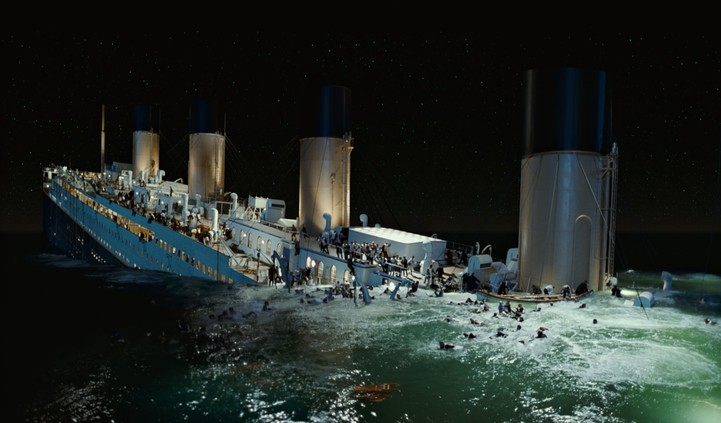


**AIM**:
Building a model that predicts whether a passenger on the Titanic survived or not
using the given dataset

**IMPORTING ESSENTIAL LIBRARIES**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
np.random.seed(42)

**DATA COLLECTION, PROCESSING AND ANALYSIS**

In [ ]:
#takes a path to a CSV file and reads the data into a DataFrame
df=pd.read_csv("/content/tested.xls")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,0,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [ ]:
df.shape

(418, 12)

In [ ]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,418.0,1100.500000,120.810458,892.00,996.2500,1100.5000,1204.75,1309.0000
Survived,418.0,0.363636,0.481622,0.00,0.0000,0.0000,1.00,1.0000
Pclass,418.0,2.265550,0.841838,1.00,1.0000,3.0000,3.00,3.0000
Age,332.0,30.272590,14.181209,0.17,21.0000,27.0000,39.00,76.0000
SibSp,418.0,0.447368,0.896760,0.00,0.0000,0.0000,1.00,8.0000
Parch,418.0,0.392344,0.981429,0.00,0.0000,0.0000,0.00,9.0000
Fare,417.0,35.627188,55.907576,0.00,7.8958,14.4542,31.50,512.3292


In [ ]:
df.describe(include='object').T

,count,unique,top,freq
Name,418,418,"Kelly, Mr. James",1
Sex,418,2,male,266
Ticket,418,363,PC 17608,5
Cabin,91,76,B57 B59 B63 B66,3
Embarked,418,3,S,270


In [ ]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [ ]:
df['Cabin'].value_counts()

B57 B59 B63 B66    3
B45                2
C89                2
C55 C57            2
A34                2
                  ..
E52                1
D30                1
E31                1
C62 C64            1
C105               1
Name: Cabin, Length: 76, dtype: int64

In [ ]:
#droping irrelavant column
df.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,34.5,0,0,7.8292,NaN,Q
1,1,3,female,47.0,1,0,7.0000,NaN,S
2,0,2,male,62.0,0,0,9.6875,NaN,Q
3,0,3,male,27.0,0,0,8.6625,NaN,S
4,1,3,female,22.0,1,1,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...
413,0,3,male,NaN,0,0,8.0500,NaN,S
414,1,1,female,39.0,0,0,108.9000,C105,C
415,0,3,male,38.5,0,0,7.2500,NaN,S
416,0,3,male,NaN,0,0,8.0500,NaN,S


In [ ]:
df['Age']=df['Age'].fillna(df['Age'].mean())
df['Fare']=df['Fare'].fillna(df['Fare'].mode()[0])

In [ ]:
df.isna().sum()

Survived      0
Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Cabin       327
Embarked      0
dtype: int64

In [ ]:
#drops the "Cabin" column from the DataFrame
df.drop(['Cabin'],axis=1,inplace=True)

In [ ]:
df.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  418 non-null    int64  
 1   Pclass    418 non-null    int64  
 2   Sex       418 non-null    object 
 3   Age       418 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Fare      418 non-null    float64
 7   Embarked  418 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 26.2+ KB


In [ ]:
df.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

**DATA VISUALIZATION**

In [ ]:
df['Survived'].value_counts()

0    266
1    152
Name: Survived, dtype: int64

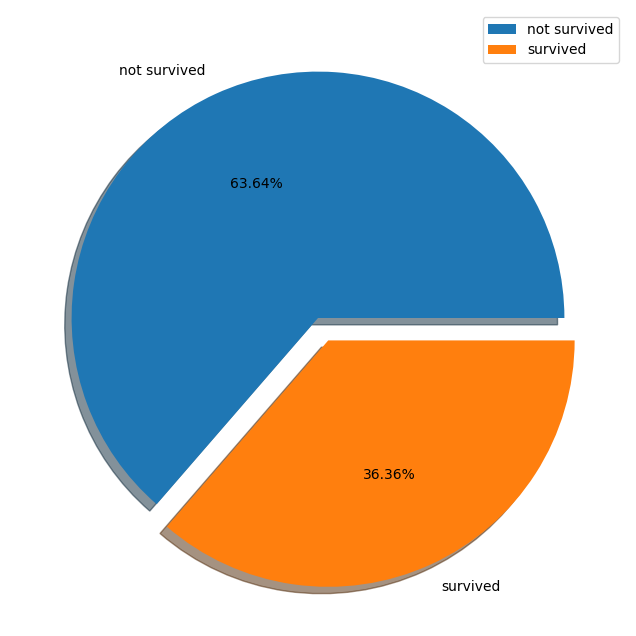

In [ ]:
plt.figure(figsize=(10,8))
label=['not survived','survived']
plt.pie(df['Survived'].value_counts(),labels=label,autopct='%1.2f%%',explode=[0,0.1],shadow=True)
plt.legend()

In [ ]:
df['Sex'].value_counts()

male      266
female    152
Name: Sex, dtype: int64

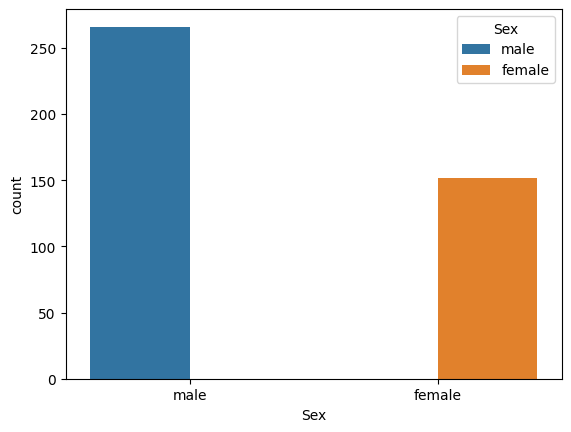

In [ ]:
color=['teal','green']
sns.countplot(x='Sex',data=df,hue='Sex')
plt.show()

<Axes: xlabel='Pclass', ylabel='count'>

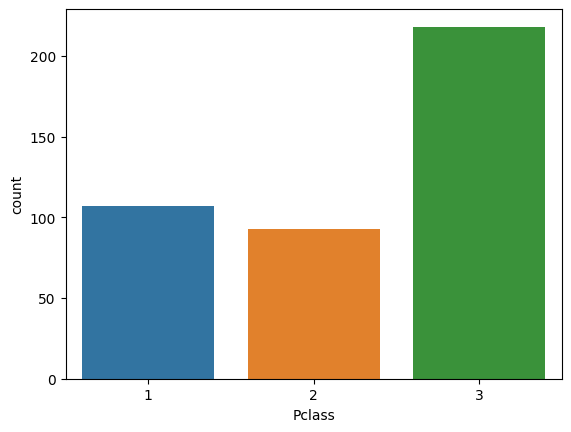

In [ ]:
sns.countplot(x='Pclass',data=df)

<Axes: xlabel='Pclass', ylabel='Survived'>

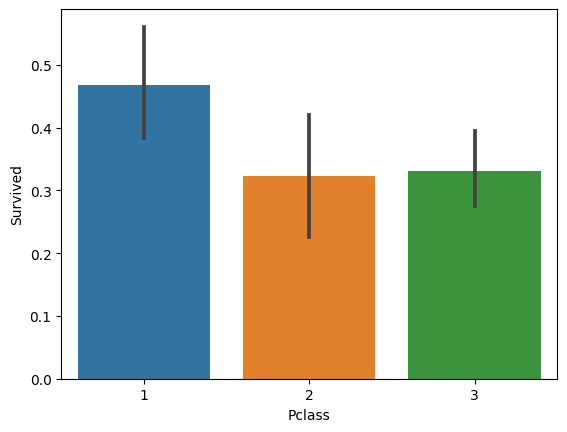

In [ ]:
sns.barplot(x=df['Pclass'],y=df['Survived'])

<Axes: xlabel='Pclass', ylabel='count'>

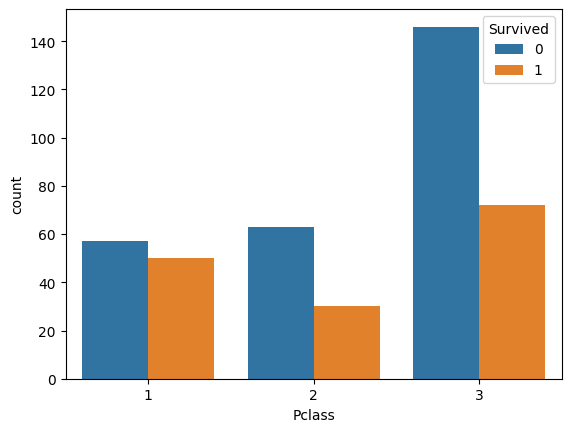

In [ ]:
sns.countplot(x='Pclass',data=df,hue='Survived')

**CORRELATION**

In [ ]:
df.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.108615,-0.000011,0.099943,0.159120,0.192229
Pclass,-0.108615,1.000000,-0.440782,0.001087,0.018721,-0.577491
Age,-0.000011,-0.440782,1.000000,-0.079535,-0.045073,0.323839
SibSp,0.099943,0.001087,-0.079535,1.000000,0.306895,0.172034
Parch,0.159120,0.018721,-0.045073,0.306895,1.000000,0.230411
Fare,0.192229,-0.577491,0.323839,0.172034,0.230411,1.000000


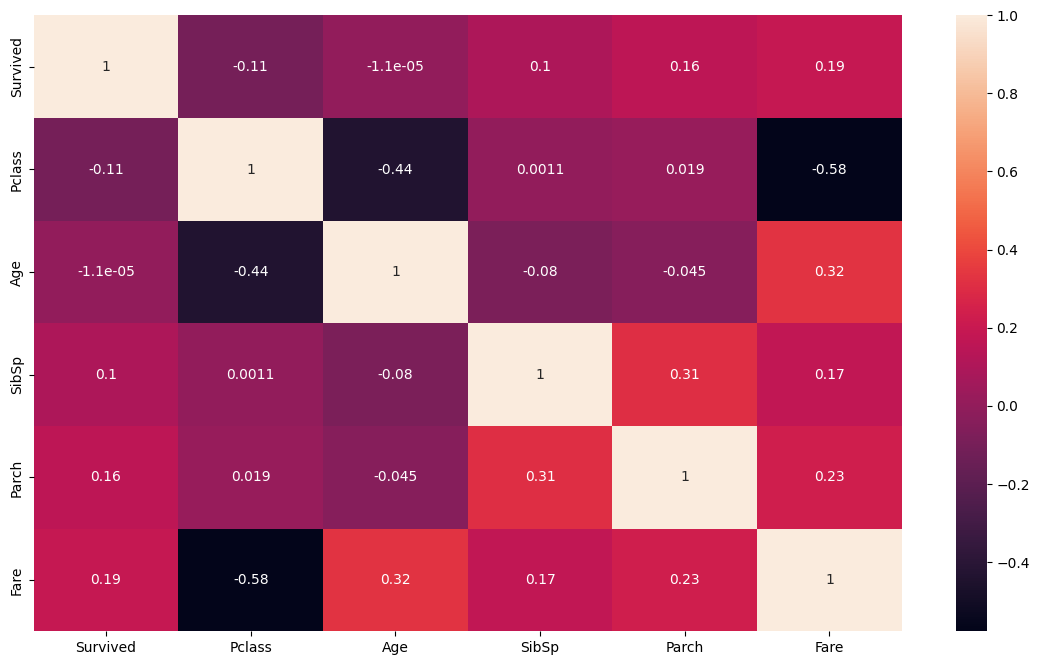

In [ ]:
plt.figure(figsize=(14,8))
sns.heatmap(df.corr(),annot=True)
plt.show()

<Axes: title={'center': 'Correlated with Survived Column'}>

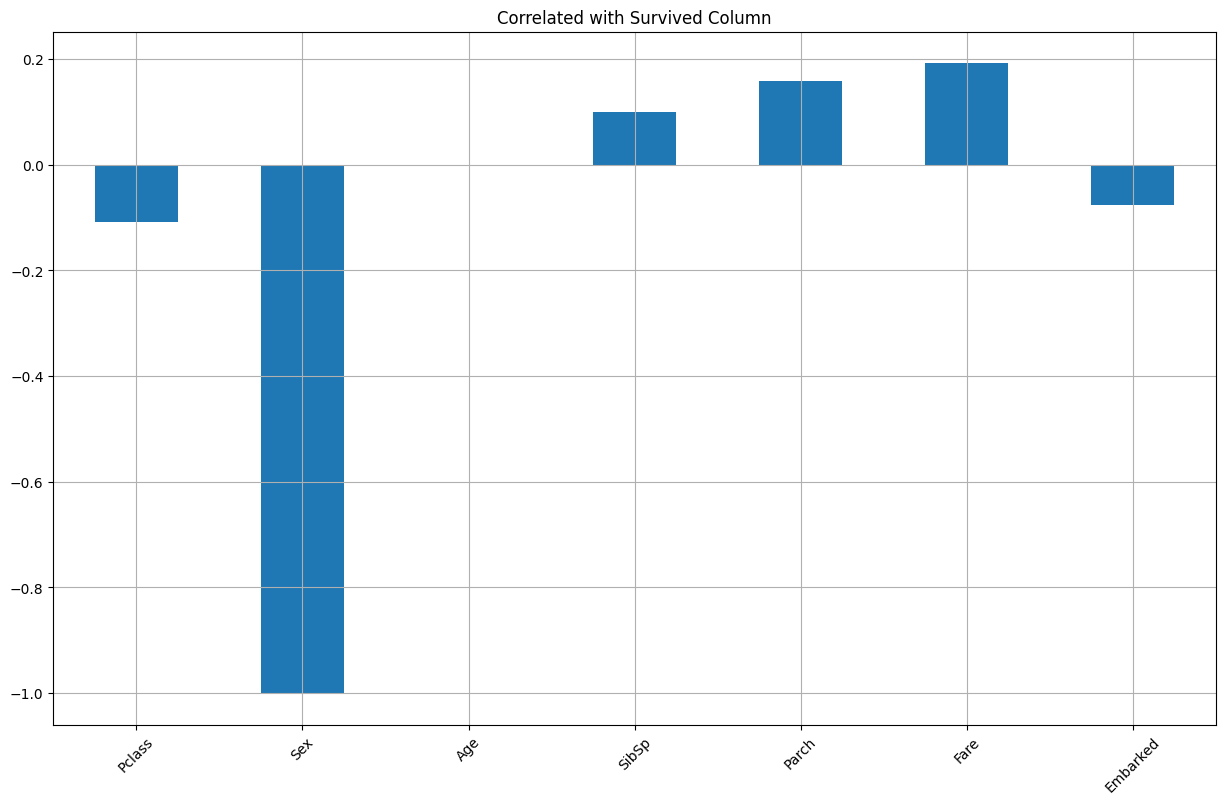

In [ ]:
df1=df.drop(columns='Survived')
df1.corrwith(df['Survived']).plot.bar(figsize=(15,9),title='Correlated with Survived Column',rot=45,grid=True)

**LABEL ENCODING**

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Sex']=le.fit_transform(df['Sex'])
df['Embarked']=le.fit_transform(df['Embarked'])
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,34.50000,0,0,7.8292,1
1,1,3,0,47.00000,1,0,7.0000,2
2,0,2,1,62.00000,0,0,9.6875,1
3,0,3,1,27.00000,0,0,8.6625,2
4,1,3,0,22.00000,1,1,12.2875,2
...,...,...,...,...,...,...,...,...
413,0,3,1,30.27259,0,0,8.0500,2
414,1,1,0,39.00000,0,0,108.9000,0
415,0,3,1,38.50000,0,0,7.2500,2
416,0,3,1,30.27259,0,0,8.0500,2


**X AND Y SEPARATION**

In [ ]:
x=df.drop(columns='Survived',axis=1)
y=df['Survived']

In [ ]:
x

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.50000,0,0,7.8292,1
1,3,0,47.00000,1,0,7.0000,2
2,2,1,62.00000,0,0,9.6875,1
3,3,1,27.00000,0,0,8.6625,2
4,3,0,22.00000,1,1,12.2875,2
...,...,...,...,...,...,...,...
413,3,1,30.27259,0,0,8.0500,2
414,1,0,39.00000,0,0,108.9000,0
415,3,1,38.50000,0,0,7.2500,2
416,3,1,30.27259,0,0,8.0500,2


In [ ]:
y

0      0
1      1
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    0
Name: Survived, Length: 418, dtype: int64

**SPLITING IN TO TRAINING AND TESTING DATA**

In [ ]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)


**FEATURE SCALING**

In [ ]:
from sklearn.preprocessing import StandardScaler
sd=StandardScaler()
x_train=sd.fit_transform(x_train)
x_test=sd.fit_transform(x_test)


In [ ]:
from sklearn.metrics import accuracy_score,classification_report,ConfusionMatrixDisplay

# `MODEL BUILDING AND EVALUATION`



>  **K Nearest Neighbor Classifier**

> **SVC**

> **LOGISTIC REGRESSION**

> **DECISION TREE CLASSIFIER**

> **RANDOM FOREST CLASSIFIER**









  




**1.KNN (K Nearest Neighbours)**

In [ ]:
#model creation
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=7)
knn.fit(x_train,y_train)
knn_pred=knn.predict(x_test)

In [ ]:
#accuracy score
knn_acc=accuracy_score(y_test,knn_pred)
knn_acc

0.9841269841269841

              precision    recall  f1-score   support

           0       0.99      0.99      0.99        85
           1       0.98      0.98      0.98        41

    accuracy                           0.98       126
   macro avg       0.98      0.98      0.98       126
weighted avg       0.98      0.98      0.98       126



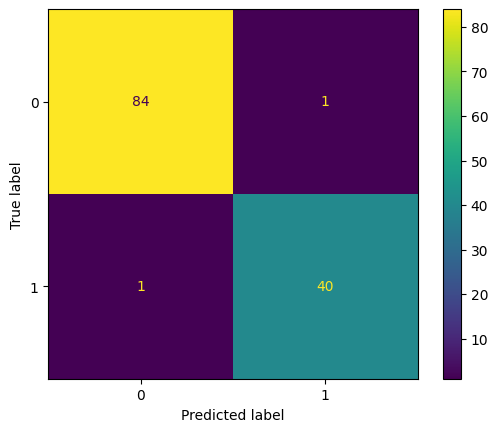

In [ ]:
#classification report and confusion matrix
print(classification_report(y_test,knn_pred))
print(ConfusionMatrixDisplay.from_predictions(y_test,knn_pred))

**2.SVC (SUPPORT VECTOR CLASSIFIER)**

In [ ]:
#model creation
from sklearn.svm import SVC
model=SVC()
model.fit(x_train,y_train)
y_pred_svm=model.predict(x_test)


In [ ]:
#accuracy score
svm_acc=(accuracy_score(y_test,y_pred_svm))
svm_acc

0.9920634920634921

              precision    recall  f1-score   support

           0       0.99      1.00      0.99        85
           1       1.00      0.98      0.99        41

    accuracy                           0.99       126
   macro avg       0.99      0.99      0.99       126
weighted avg       0.99      0.99      0.99       126



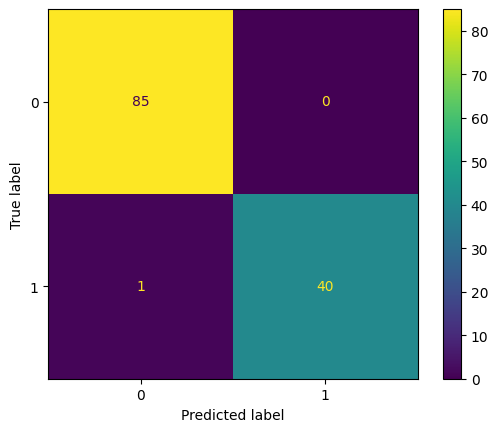

In [ ]:
print(classification_report(y_test,y_pred_svm))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred_svm))

**3.LOGISTIC REGRESSION**

In [ ]:
#model creation
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression(random_state=42)
lg.fit(x_train,y_train)
y_pred_lg=lg.predict(x_test)


In [ ]:
#accuracy score
lg_acc=(accuracy_score(y_test,y_pred_lg))
lg_acc

1.0

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        85
           1       1.00      1.00      1.00        41

    accuracy                           1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126



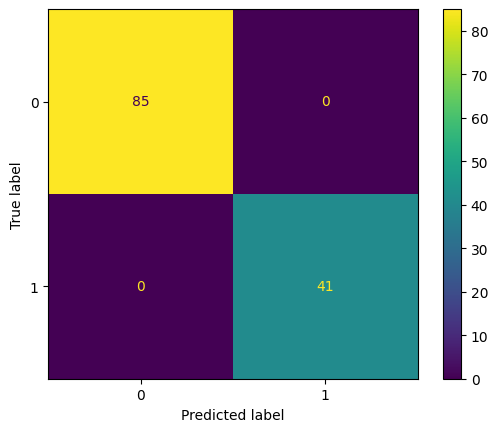

In [ ]:
#classification report and confusion matrix
print(classification_report(y_test,y_pred_lg))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred_lg))

**4.DECISION TREE CLASSIFIER**

1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        85
           1       1.00      1.00      1.00        41

    accuracy                           1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126



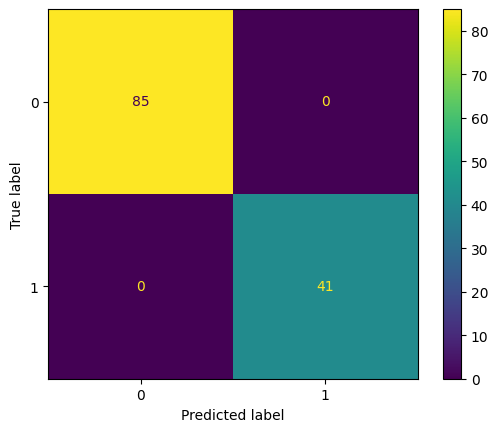

In [ ]:
#model creation
from sklearn.tree import DecisionTreeClassifier
decision=DecisionTreeClassifier()
decision.fit(x_train,y_train)
y_pred_decision=decision.predict(x_test)

In [ ]:
#accuracy score
dtree_acc=accuracy_score(y_test,y_pred_decision)
dtree_acc

1.0

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        85
           1       1.00      1.00      1.00        41

    accuracy                           1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126



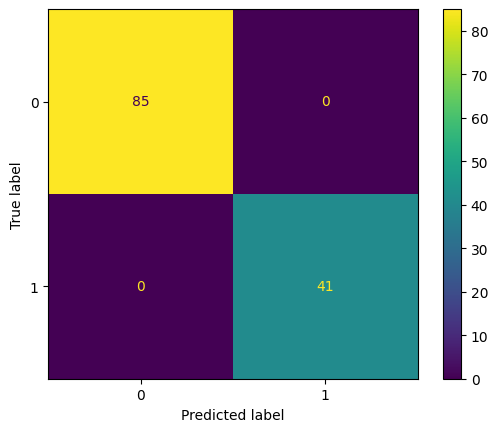

In [ ]:
#classification report and confusion matrix
print(classification_report(y_test,y_pred_decision))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred_decision))

**RANDOM FOREST CLASSIFIER**

In [ ]:
#model creation
from sklearn.ensemble import RandomForestClassifier
random=RandomForestClassifier(random_state=42)
random.fit(x_train,y_train)
y_pred_random=random.predict(x_test)


In [ ]:
#accuracy score
rf_acc=accuracy_score(y_test,y_pred_random)
rf_acc

1.0

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        85
           1       1.00      1.00      1.00        41

    accuracy                           1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126



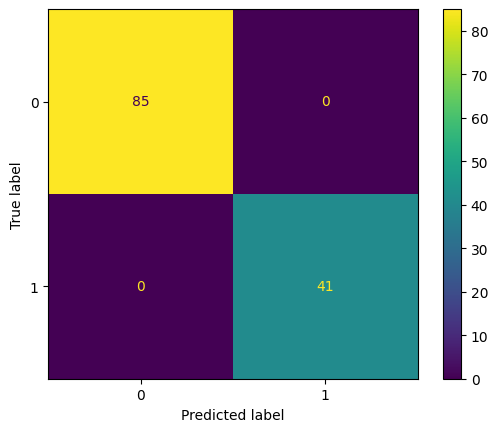

In [ ]:
#classification report and confusion matrix
print(classification_report(y_test,y_pred_random))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred_random))

In [ ]:
model=['KNN','SVM','LOGISTIC','DECISION TREE','RANDOM FOREST']
accuracy_scores=[knn_acc,svm_acc,lg_acc,dtree_acc,rf_acc]
accuracy_scores

[0.9841269841269841, 0.9920634920634921, 1.0, 1.0, 1.0]

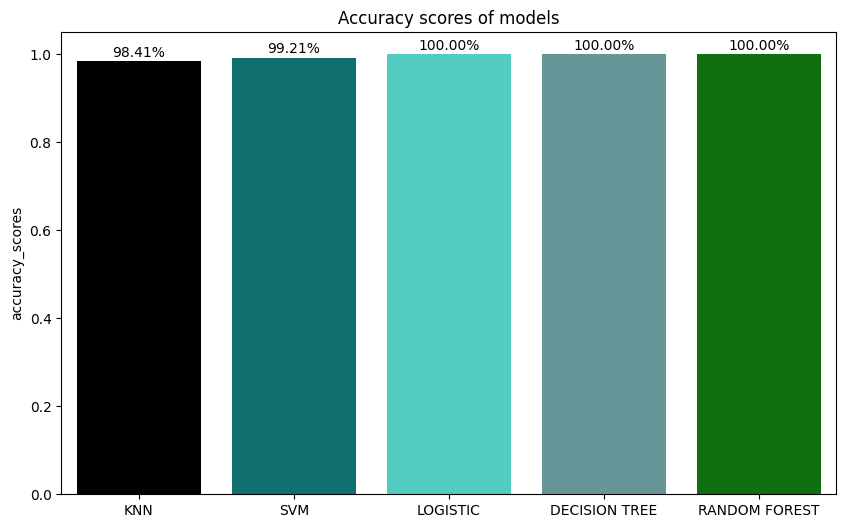

In [ ]:
color=['black','teal','turquoise','cadetblue','green']
plt.figure(figsize=(10,6))
sns.barplot(x=model,y=accuracy_scores,palette=color)
plt.ylabel('accuracy_scores')
plt.title('Accuracy scores of models')
# Adding percentage labels
for i, score in enumerate(accuracy_scores):
    plt.text(i, score +0.01, f'{score*100:.2f}%' , ha = 'center')
plt.show()

# CONCLUSION

After a comprehensive analysis on the Titanic Survival Prediction dataset, multiple machine learning models were employed:



*   **KNN**: 98.41% accuracy  

*   **SVM**: 99.21% accuracy

*  **Logistic Regression**: 100% accuracy
*  **Decision Tree**: 100% accuracy


*  **Random Forest**: 100% accuracy

All models performed exceptionally well, achieving high accuracy scores. It's noteworthy that the Logistic Regression, Decision Tree, and Random Forest models achieved perfect accuracy, indicating robust predictive capabilities.



